In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [2]:
movies = pd.read_csv("data/tmdb_5000_movies.csv")
credits = pd.read_csv("data/tmdb_5000_credits.csv")

In [3]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [4]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [6]:
data_comp = movies.merge(credits, on ='title')

In [7]:
data_comp.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


Filtering the columns necessary for recommendation system(content based)

In [9]:
data_comp.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [10]:
# we focus on filtering mostly categorical cols which hold some value for building a content based recommendation system
# genres, id, keywords, overview, title, cast and crew are importatn columns  
# The column original_language could also be considered importatn but there is huge imbalance in this column

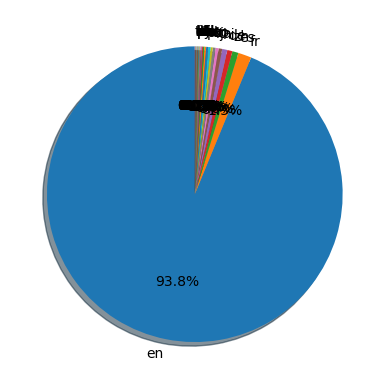

In [11]:
plt.pie(data_comp['original_language'].value_counts(), labels = (data_comp['original_language'].value_counts()).index,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

# as the below chart shows that all the most of the languages are english

In [12]:
# filtering the columns
films = data_comp[['id','title','overview','genres','keywords','cast','crew']]
films.head(2)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


we still have some preprocessing to do, as we aim in transforming this dataset into a smaller one with id, name, genre and mixture of overview, keywords, cast and crew

In [14]:
films.genres.iloc[0]
# from this we only want the listed genres ['Action','Adventure','Science Fiction']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [15]:
def convert(ser_obj):
    L = []
    for i in ast.literal_eval(ser_obj):
        L.append(i['name'])
    return L

In [16]:
# literal_eval is used to convert genre into a list object as gnere is a string list
films['genres'].dtype

dtype('O')

In [17]:
films['genres'] = films['genres'].apply(convert)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_10756\1059883675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films['genres'] = films['genres'].apply(convert)


In [18]:
films.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [19]:
# keywords
films.keywords.iloc[0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [20]:
films.keywords = films.keywords.apply(convert)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_10756\4157520518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films.keywords = films.keywords.apply(convert)


In [21]:
films.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [22]:
# cast
films.cast.iloc[0]
# A movie has a lots of cast, but it's face are the lead actors, so we are going to filter out only 3 cast as thier real name

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [23]:
def converter1(ser_obj):
    l = []
    counter = 0
    for i in ast.literal_eval(ser_obj):
        if counter < 3:
            l.append(i['name'])
            counter += 1
        else:
            break
    return l

In [24]:
films.cast = films.cast.apply(converter1)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_10756\4118565019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films.cast = films.cast.apply(converter1)


In [25]:
films.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [26]:
# crew -> for finding the director of the movie
films.crew.iloc[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [27]:
def converter2(ser_obj):
    l = []
    for i in ast.literal_eval(ser_obj):
        if i['job'] == 'Director':
            l.append(i['name'])
            break
    return l

In [28]:
films['crew'] = films.crew.apply(converter2)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_10756\1063962612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films['crew'] = films.crew.apply(converter2)


In [29]:
films.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


In [30]:
# lets check for some data inconsistency 
print(films.isnull().sum())

# we drop the duplicates and reassign the df to the same value
films.dropna(inplace = True)

id          0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64


C:\Users\LEGION\AppData\Local\Temp\ipykernel_10756\549854587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films.dropna(inplace = True)


In [31]:
# check for duplicates
# films[films.duplicated()]


In [32]:
# Now we convert the overview column into a list so concatenating the columns becomes more easier for now it is
print(films.overview.dtype)

object


In [33]:
films['overview'] = films['overview'].apply(lambda x:x.split())

C:\Users\LEGION\AppData\Local\Temp\ipykernel_10756\2931076705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films['overview'] = films['overview'].apply(lambda x:x.split())


In [34]:
films.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


In [35]:
# now we focus on concatenating the columns for creating tags but before that we have to care that there are no spaces in betwenn the same tags like
# sam Worthington should be samWorthington as sam Worthington represents a single person in real life and we we train the model with the same name 
# "sam Worthington" it is going to be treated as two different persons. we do this operation for all the columns

In [36]:
films.genres = films.genres.apply(lambda x:[i.replace(" ","") for i in x])
films.overview = films.overview.apply(lambda x:[i.replace(" ","") for i in x])
films.keywords = films.keywords.apply(lambda x:[i.replace(" ","") for i in x])
films.cast = films.cast.apply(lambda x:[i.replace(" ","") for i in x])
films.crew = films.crew.apply(lambda x:[i.replace(" ","") for i in x])

C:\Users\LEGION\AppData\Local\Temp\ipykernel_10756\3239592523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films.genres = films.genres.apply(lambda x:[i.replace(" ","") for i in x])
C:\Users\LEGION\AppData\Local\Temp\ipykernel_10756\3239592523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films.overview = films.overview.apply(lambda x:[i.replace(" ","") for i in x])
C:\Users\LEGION\AppData\Local\Temp\ipykernel_10756\3239592523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [37]:
films.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]


In [38]:
# # combining the colums to form a single tag colum
films['tag'] = films.overview + films.genres + films.keywords + films.cast + films.crew
films.drop(columns = ["overview","genres","keywords","cast","crew"],inplace = True)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_10756\3478312593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films['tag'] = films.overview + films.genres + films.keywords + films.cast + films.crew
C:\Users\LEGION\AppData\Local\Temp\ipykernel_10756\3478312593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films.drop(columns = ["overview","genres","keywords","cast","crew"],inplace = True)


In [39]:
films.head()

,id,title,tag
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [40]:
# The tag column is a list but we have to convert it back to a string object
films.tag = films.tag.apply(lambda x:" ".join(x))

C:\Users\LEGION\AppData\Local\Temp\ipykernel_10756\3185273630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films.tag = films.tag.apply(lambda x:" ".join(x))


In [41]:
films.head(1)

,id,title,tag
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."


In [42]:
films.tag.iloc[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [43]:
# The data is still not in the form on which we can work on, theese are all textual data, which we have to convert into vectors where we can calculate a 
# similarity score for providing a suggestion

# but before we move on to vectorization of the tag column, we have to stem(loving, loved,loves -> love) and remove stop words like (is, am, for) 
# the text data for more accurate results.
# Stemming is also important as we approach to recoomed movies based on the frequency of 5000(can be any number) most apperaing words after we 
# concatenate all the rows of tag column. Then we will form a vector of 5000 dimension

# trying to vectorize with no stemming

In [45]:
# importing requities
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000,stop_words = 'english')
# max_features -> numbers of words or dimension for vectorization
# stop_words -> removing the stop words 

In [46]:
movie_vectors_large_string = cv.fit_transform(films['tag']).toarray()
print(movie_vectors_large_string.shape) # -4806 rows for the number of movies and 5000 most repetitive word in a single tag string

(4806, 5000)


In [47]:
movie_vectors_large_string

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
movie_vectors_large_string[0] # gives the movie in 0th index avatar in this case

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
# checking the most frequent words
cv.get_feature_names_out() # arranged alphabetically not by higher frequency

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [50]:
fea_names = cv.get_feature_names_out()
counter = 0
for names in fea_names:
    if counter <100:
        print(names)
        counter +=1
    else:
        break

# here the words 'ability' and 'abilities' are repeated which basically means same thing

000
007
10
100
11
12
13
14
15
16
17
18
18th
19
1930s
1940s
1950
1950s
1960s
1970s
1980
1980s
1985
1990s
1999
19th
19thcentury
20
200
2009
20th
24
25
30
300
3d
40
50
500
60
60s
70
70s
aaron
aaroneckhart
abandoned
abducted
abigailbreslin
abilities
ability
able
aboard
abuse
abusive
academy
accept
accepted
accepts
access
accident
accidental
accidentally
accompanied
accomplish
account
accountant
accused
ace
achieve
act
acting
action
actionhero
actions
activist
activities
activity
actor
actors
actress
acts
actual
actually
adam
adams
adamsandler
adamshankman
adaptation
adapted
addict
addicted
addiction
adolescence
adolescent
adopt
adopted
adoption
adopts
adrienbrody
adult


# Stemming 

In [52]:
# before stemming we will convert all the tags into lower case
films.tag = films.tag.apply(lambda x:x.lower())
films.head(3)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_10756\3706492823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films.tag = films.tag.apply(lambda x:x.lower())


,id,title,tag
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...


In [53]:
# stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [54]:
# creating a helper function for stemming
def stem(str_obj):
    l = []
    for str in str_obj.split():
        stemmed = ps.stem(str)
        l.append(stemmed)
    return " ".join(l)

# notice in the for loop we range it by str_obj.split() becuase this converts the str_obj(string) into a list if we don't do this the loop is going to
# iterate over a single character 'i' and not over 'in'.

In [55]:
films.tag = films.tag.apply(stem)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_10756\3737408564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films.tag = films.tag.apply(stem)


In [56]:
films.head(3)

,id,title,tag
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...


In [57]:
# vectorizing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words = 'english')

vectors = cv.fit_transform(films.tag).toarray()

In [58]:
vectors.shape

(4806, 5000)

In [59]:
fea_names = cv.get_feature_names_out()
counter = 0
for names in fea_names:
    if counter <100:
        print(names)
        counter +=1
    else:
        break

000
007
10
100
11
12
13
14
15
16
17
17th
18
18th
18thcenturi
19
1910
1920
1930
1940
1944
1950
1950s
1960
1960s
1970
1970s
1971
1974
1976
1980
1985
1990
1999
19th
19thcenturi
20
200
2003
2009
20th
21st
23
24
25
30
300
3d
40
50
500
60
70
80
aaron
aaroneckhart
abandon
abduct
abigailbreslin
abil
abl
aboard
abov
abus
academ
academi
accept
access
accid
accident
acclaim
accompani
accomplish
account
accus
ace
achiev
acquaint
act
action
actionhero
activ
activist
activities
actor
actress
actual
ad
adam
adamsandl
adamshankman
adapt
add
addict
adjust
admir
admit
adolesc
adopt
ador


# Similarity between each vector

In [61]:
# for recommending the movies we need to have a measure of similarity between the vectors that we formed on the basis of 5000 frequent words.
# The best way to know how similar are the movies or the vectors will be to find the distance between each of the vectors, but in this ecludian distance
# won't be a very good measuer so we focus on the angular distance formed between the vectors with cosine function becasue it restricts the output 
# between -1 and 1

# sklearn provides both cosine distance and cosine similarity (similarty is 1/distance) we will work with similarity

In [62]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

In [63]:
similarity

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

In [64]:
similarity.shape
# the shape is 4806, 4806 as similarity scores of each vector with every other vectors are calculated, for the same reason the similarity score with 
# one self is 1 

(4806, 4806)

# Final function

In [66]:
# for us to recommend five movies closest to the users watch behaviour we need to have the movies feteched by the index
similarity[0]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [67]:
def recommend(movies):
    mov_index = films[films['title'] == movies].index[0]
    similarity_row = similarity[mov_index]
    # we sort the similarity_row but we will have to be very careful that we don't lose the index of the movies while we sort them, so we use enumerate
    sorted_score = sorted(list(enumerate(similarity_row)),reverse = True, key = lambda x:x[1])[1:6]

    for score in sorted_score:
        print(films.iloc[score[0]].title)
        # print(score[0])

In [68]:
recommend("Avatar")

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.


In [69]:
# role of enumerate
list(enumerate(similarity[0]))

[(0, 0.9999999999999998),
 (1, 0.08346223261119858),
 (2, 0.08603090020146066),
 (3, 0.0734718358370645),
 (4, 0.1892994097121204),
 (5, 0.10838874619051501),
 (6, 0.04024218182927669),
 (7, 0.14673479641335554),
 (8, 0.05923488777590923),
 (9, 0.0967301666813349),
 (10, 0.10259783520851541),
 (11, 0.09464970485606021),
 (12, 0.09037128496931669),
 (13, 0.04499212706658476),
 (14, 0.12824729401064427),
 (15, 0.06282808624375433),
 (16, 0.07894736842105264),
 (17, 0.13977653617040256),
 (18, 0.09493290614465533),
 (19, 0.0830812984794528),
 (20, 0.058038100008800934),
 (21, 0.10968169942141635),
 (22, 0.0662266178532522),
 (23, 0.08740748201220976),
 (24, 0.0533380747062665),
 (25, 0.05101627678885769),
 (26, 0.15389675281277312),
 (27, 0.18693292157876878),
 (28, 0.116543309349613),
 (29, 0.065033247714309),
 (30, 0.06684847767323797),
 (31, 0.15907119074394446),
 (32, 0.08520286456846099),
 (33, 0.09733285267845754),
 (34, 0.0),
 (35, 0.09933992677987831),
 (36, 0.17316974359835272),


In [70]:
sorted(list(enumerate(similarity[0])),reverse = True, key = lambda x:x[1])

[(0, 0.9999999999999998),
 (1214, 0.2867696673382022),
 (2405, 0.26901379342448517),
 (3728, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574),
 (582, 0.24511108480187255),
 (1202, 0.24455799402225922),
 (1192, 0.2367785320221084),
 (61, 0.23179316248638276),
 (778, 0.23174488732966075),
 (4046, 0.2278389747471728),
 (1916, 0.2252817784447915),
 (2782, 0.21853668936906193),
 (172, 0.21239769762143662),
 (972, 0.2108663315950723),
 (322, 0.2105263157894737),
 (2329, 0.20443988269091462),
 (3606, 0.20437977982832192),
 (260, 0.20395079136182276),
 (151, 0.2029530274475215),
 (4190, 0.2029530274475215),
 (1440, 0.20277677641345318),
 (74, 0.20246457179963145),
 (1087, 0.2020475485519274),
 (3671, 0.1979082783981174),
 (973, 0.19767387315371682),
 (577, 0.1976738731537168),
 (47, 0.19672236884115843),
 (2969, 0.19252140716412977),
 (942, 0.19134594929397597),
 (495, 0.19088542889273336),
 (1199, 0.19088542889273336),
 (305, 0.19007487139298027),
 (4, 0.18929940971

In [71]:
recommend('Batman')

Batman
Batman & Robin
Batman Begins
Batman Returns
The R.M.


In [72]:
recommend('The Matrix')

The Matrix Revolutions
The Matrix Reloaded
Hackers
The Thirteenth Floor
WarGames


In [73]:
films.title.sample(10)

1759                    Lake Placid
4635      Some Guy Who Kills People
1211                        Gothika
2604    The Man with the Iron Fists
1175                   Ride Along 2
3167                  Loose Cannons
2730             The Last Godfather
2036                   Delivery Man
4610          It Happened One Night
4558                Girls Gone Dead
Name: title, dtype: object

In [74]:
(films.title == "The Shawshank Redemption").sum()

1

In [75]:
import pickle
# pickle.dump(films.to_dict(),open('films_dict.pkl','wb'))

In [148]:
pickle.dump(similarity, open('similarity.pkl','wb'))    